# <span style='color:Black'>    CMSC-641  Graph Cut Images          
                                                                            Abhishek Chintalapati EC82333   

 # <span style='color:Blue'> Modules Used for this Project </span>

In [157]:
import math
from skimage import io, util
import heapq
import matplotlib.pyplot as plt
import json
from cmath import inf
from turtle import pd
from unittest.mock import patch
import numpy as np
import os

# <span style='color:Blue'> Implementation of Graph cut Images using Edmand  Karp Algorithm  </span>

In [203]:
COUNT = 0

class Graph: 
  
    def __init__(self,graph): 
        #Edmand Karp
        self.graph = graph 
        self. ROW = len(graph) 
        self.COL = len(graph[0]) 
        self.organiz_graph = [i[:] for i in graph] 

  
    def Breadth_First_search(self,s, t, parent): 
  
        # vertices as not visited 
        visited =[False]*(self.ROW) 
  
        # queue for BFS 
        queue=[]
        
        # visited and enqueue it 
        queue.append(s) 
        visited[s] = True
  
        # BFS Loop 
        while queue: 
  
            #Dequeue from queue 
            u = queue.pop(0) 
   
            
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 

        # If we reached sink in BFS starting
        # from source, then return 
        # true, else false
        return True if visited[t] else False
          
     
    # DFS Traversal of the graph
    def Depth_first_search(self, graph,s,visited):
        visited[s]=True
        for i in range(len(graph)):
            if graph[s][i]>0 and not visited[i]:
                self.Depth_first_search(graph,i,visited)
  
    #  min-cut of the graph 
    def minCut(self, source, sink): 
        pix = []
        parent = [-1]*(self.ROW) 
  
        max_flow = 0 # intial flow   
        while self.Breadth_First_search(source, sink, parent) :  
            flow_path = float("Inf") 
            s = sink 
            while(s != source): 
                flow_path = min (flow_path, self.graph[parent[s]][s]) 
                s = parent[s] 
  
            # flow to overall flow 
            max_flow += flow_path 
  
            # update residual capacities of the edges and reverse edges  
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= flow_path 
                self.graph[v][u] += flow_path 
                v = parent[v] 
  
        visited=len(self.graph)*[False]
        self.Depth_first_search(self.graph,s,visited)
  
        for i in range(self.ROW): 
            for j in range(self.COL): 
                if self.graph[i][j] == 0 and\
                self.organiz_graph[i][j] > 0 and visited[i]: 
                    print(str(i) + " - " + str(j))
                    pix.append(str(i) + "-" + str(j))
                    
        return visited, pix

def random_patch_1(texture, patchLength):
    #generating a random patch
    h, w, _ = texture.shape
    i = np.random.randint(h - patchLength)
    j = np.random.randint(w - patchLength)

    return texture[i:i+patchLength, j:j+patchLength]


def lap_error(patch, patchLength, overlap, res, y, x):
    # calculating patch error 
    error = 0

    if x > 0:
        left_side = patch[:, :overlap] - res[y:y+patchLength, x:x+overlap]
        error += np.sum(left_side**2)

    if y > 0:
        upper_side   = patch[:overlap, :] - res[y:y+overlap, x:x+patchLength]
        error += np.sum(upper_side**2)

    if x > 0 and y > 0:
        corner_side = patch[:overlap, :overlap] - res[y:y+overlap, x:x+overlap]
        error -= np.sum(corner_side**2)

    return error
 

def random_patch_2(texture, patchLength, overlap, res, y, x):
    # returning a best random patch based on error
    height, width, color_ = texture.shape
    errors = np.zeros((height - patchLength, width - patchLength))

    for i in range(height - patchLength):
        for j in range(width - patchLength):
            patch = texture[i:i+patchLength, j:j+patchLength]
            e = lap_error(patch, patchLength, overlap, res, y, x)
            errors[i, j] = e

    i, j = np.unravel_index(np.argmin(errors), errors.shape)
    return texture[i:i+patchLength, j:j+patchLength]

def quilt(texture, patchLength, numPatches, mode="cut", sequence=False):
    # main function call
    texture = util.img_as_float(texture)
    overlap = 4
    numPatchesHigh, numPatchesWide = numPatches

    h = (numPatchesHigh * patchLength) - (numPatchesHigh - 1) * overlap
    w = (numPatchesWide * patchLength) - (numPatchesWide - 1) * overlap

    res = np.zeros((h, w, texture.shape[2]))
    for i in range(3):
        for j in range(3):
            y = i * (patchLength - overlap)
            x = j * (patchLength - overlap)
            if i == 0 and j == 0 or mode == "random":
                #first row first column taking a random patch
                patch = random_patch_1(texture, patchLength)
                patch_1 = patch
                patch_2 = patch.copy()
                average_patch_1 = matrix_average(patch)
                average_patch_last_columns = get_last_columns(average_patch_1)
            elif mode == "cut":
                patch = random_patch_2(texture, patchLength, overlap, res, y, x)
                patch_3 = patch.copy()
                average_patch = matrix_average(patch) # calculating average pixels of the matrix
                if j == 1 and i ==0:
                    rand = patch
                    second = get_last_columns(average_patch) 
                average_patch_first_columns = get_first_columns(average_patch)
                avg_first_col = average_patch_first_columns.copy()
                if j == 1 and i ==0:
                    patch_test_1, patch = get_graph_matrix(average_patch_last_columns, average_patch_first_columns,patch_1, patch,  patchLength, overlap)
                    patch_0_1 = patch.copy()
                if j == 2 and i ==0:
                    patch_test, patch = get_graph_matrix(second, avg_first_col ,rand, patch_3, patchLength, overlap)
                    patch_0_2 = patch.copy()
                if i == 1 and j == 0:
                    test = matrix_average(patch_2)
                    ans = get_last_rows (test)
                    last_row_mat = ans.transpose()
                    test_1 = matrix_average(patch_3)
                    ans_1 = get_first_rows (test_1)
                    first_row_mat = ans_1.transpose()
                    patch_1_0_trans = patch_3.transpose(1,0,2)
                    patch_0_1_trans = patch_2.transpose(1,0,2)
                    com_patch, hori_0_1 = get_graph_matrix (last_row_mat, first_row_mat,patch_0_1_trans,patch_1_0_trans,patchLength, overlap)
                    patch = hori_0_1.transpose(1,0,2)
                    patch_1_0 = patch.copy()
                if i == 1 and j == 1:
                    avg_1_0 = matrix_average(patch_1_0)
                    last_1_0 = get_last_columns(avg_1_0)
                    com_patch_1, ver_1_0 = get_graph_matrix(last_1_0, average_patch_first_columns, patch_1_0, patch_3, patchLength, overlap)
                    avg_0_1 = matrix_average(patch_0_1)
                    last_rows_0_1 = get_last_rows(avg_0_1)
                    last_row_trans = last_rows_0_1.transpose()
                    avg_1_1 = matrix_average(ver_1_0)
                    first_rows_1_1 = get_first_rows(avg_1_1)
                    first_row_trans = first_rows_1_1.transpose()
                    patch_trans_1_0 = ver_1_0.transpose(1,0,2)
                    patch_trans_0_1 = patch_0_1.transpose(1,0,2)
                    com_patch_1_1, horz_1_1 = get_graph_matrix(last_row_trans, first_row_trans, patch_trans_0_1 , patch_trans_1_0, patchLength, overlap)
                    patch = horz_1_1.transpose(1,0,2)
                    patch_1_1 = patch.copy()
                
                if i == 1 and j == 2:
                    avg_1_2= matrix_average(patch_1_1)
                    last_1_1= get_last_columns(avg_1_2)
                    com_patch_2, ver_1_2 = get_graph_matrix(last_1_1, average_patch_first_columns, patch_1_1, patch_3, patchLength, overlap)
                    avg_0_2 = matrix_average(patch_0_2)
                    last_rows_0_2 = get_last_rows(avg_0_2)
                    last_row_trans_1_2 = last_rows_0_2.transpose()
                    avg_1_2 = matrix_average(ver_1_2)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_1_2 = ver_1_2.transpose(1,0,2)
                    patch_trans_0_2 = patch_0_2.transpose(1,0,2)
                    com_patch_1_1, horz_1_2 = get_graph_matrix(last_row_trans_1_2, first_row_trans, patch_trans_0_2 , patch_trans_1_2, patchLength, overlap)
                    patch = horz_1_2.transpose(1,0,2)
                    patch_trans_1_2 = patch.copy()

                if i == 2 and j == 0:
                    avg_matrix_1_0  = matrix_average(patch_1_0)
                    last_rows_1_0 = get_last_rows (avg_matrix_1_0)
                    last_row_mat_1_0 = last_rows_1_0.transpose()
                    avg_matrix_2_0 = matrix_average(patch_3)
                    first_rows_2_0 = get_first_rows (avg_matrix_2_0)
                    first_row_mat_2_0 = first_rows_2_0.transpose()
                    patch_w = patch_3.transpose(1,0,2)
                    patch_1_s = patch_1_0.transpose(1,0,2)
                    com_patch, ver_2_0 = get_graph_matrix (last_row_mat_1_0, first_row_mat_2_0,patch_1_s,patch_w,patchLength, overlap)
                    patch = ver_2_0.transpose(1,0,2)
                    patch_2_0 = patch.copy()
                
                if i == 2 and j == 1:
                    avg_2_0= matrix_average(patch_2_0)
                    last_2_0= get_last_columns(avg_2_0)
                    com_patch_3, ver_2_0 = get_graph_matrix(last_2_0, average_patch_first_columns, patch_2_0, patch_3, patchLength, overlap)
                    avg_1_1 = matrix_average(patch_1_1)
                    last_rows_1_1 = get_last_rows(avg_1_1)
                    last_row_trans_1_1 = last_rows_1_1.transpose()
                    avg_1_2 = matrix_average(ver_2_0)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_2_0 = ver_2_0.transpose(1,0,2)
                    patch_trans_0_2 = patch_1_1.transpose(1,0,2)
                    com_patch_1_1, horz_2_1 = get_graph_matrix(last_row_trans_1_1, first_row_trans, patch_trans_0_2 , patch_trans_2_0, patchLength, overlap)
                    patch = horz_2_1.transpose(1,0,2)
                    patch_trans_2_1 = patch.copy()
                
                if i == 2 and j == 2:
                    avg_2_1= matrix_average(patch_trans_2_1)
                    last_2_1= get_last_columns(avg_2_1)
                    com_patch_5, ver_2_2 = get_graph_matrix(last_2_1, avg_first_col , patch_trans_2_1, patch_3, patchLength, overlap)
                    avg_1_2 = matrix_average(patch_trans_1_2)
                    last_rows_1_2 = get_last_rows(avg_1_2)
                    last_row_trans_1_2_2 = last_rows_1_2.transpose()
                    avg_2_2 = matrix_average(ver_2_2)
                    first_rows_2_2 = get_first_rows(avg_2_2)
                    first_row_trans_2_2 = first_rows_2_2.transpose()
                    patch_trans_2_2 = ver_2_2.transpose(1,0,2)
                    patch_trans_1_2_1 = patch_trans_1_2.transpose(1,0,2)
                    com_patch_1_1, horz_2_2 = get_graph_matrix(last_row_trans_1_2_2, first_row_trans_2_2, patch_trans_1_2_1 , patch_trans_2_2, patchLength, overlap)
                    patch = horz_2_2.transpose(1,0,2)
                    patch_trans_2_2 = patch.copy()                    

            res[y:y+patchLength, x:x+ patchLength] = patch

            if sequence:
                io.imshow(res)
                io.show()

    return res

def get_last_columns(patch):
    # last 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[-4:]
        _list.append(columns)
    return np.array(_list)

def get_first_columns(patch):
    # first 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[:4]
        _list.append(columns)
    return np.array(_list)

def get_last_rows(patch):
    # last 4 rows
    return (patch[-4:, :])

def get_first_rows(patch):
    # first 4 rows 
    return (patch [:4, :])



def get_graph_matrix(a, b, c,d, patch_length, overlap):
    _list = []
    test = []
    main_list = []
    global COUNT
    COUNT +=  1
    for i in range(patch_length-1):
        for j in range(1):
            horizontal_capacity = abs((a[i][j] - b[i][j]) + abs(a[i][j+1] - b[i][j+1]))+ 0.5  # calculating edge weights for the nodes
            horizontal_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i][j+2] - b[i][j+2]) + 0.5
            horizontal_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i][j+3] - b[i][j+3]) + 0.5
            vertical_capacity = abs(a[i+1][j] - b[i+1][j]) + abs(a[i][j] - b[i][j]) + 0.5
            vertical_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i+1][j+1] - b[i+1][j+1]) + 0.5 
            vertical_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i+1][j+2] - b[i+1][j+2]) + 0.5
            vertical_capacity_3 = abs(a[i][j+3] - b[i][j+3]) + abs(a[i+1][j+3] - b[i+1][j+3]) + 0.5
            _list.append([horizontal_capacity, horizontal_capacity_1, horizontal_capacity_2 ,vertical_capacity, vertical_capacity_1,vertical_capacity_2, vertical_capacity_3])
    _list.append([abs((a[patch_length-1][overlap-4] - b[patch_length-1][overlap-4]) + abs(a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3] )) + 0.5,abs((a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3]) + abs(a[patch_length-1][overlap-2] - b[patch_length-1][overlap-2])) + 0.5,abs((a[patch_length-1][overlap-2] - b[patch_length-1][overlap-2]) + abs(a[patch_length-1][overlap -1] - b[patch_length-1][overlap -1])) + 0.5,0,0,0,0])
    for i in range(patch_length*4 +2):
        test = []
        # calculation of Adjacency matrix
        for j in range(patch_length*4 +2):
            if i == j :
                test.append(0)
            elif i == 0:
                if j <= patch_length :
                    test.append(10000)
                else :
                    test.append(0)
            elif i == (4*(patch_length))+1:
                test.append(0)
            elif i > 0 and i <= patch_length:
                if j == i+patch_length:
                    k = abs(i% patch_length)
                    test.append(_list[k-1][0])
                elif j == i +1:
                    p = abs(i% patch_length)
                    test.append(_list[p-1][3])
                else :
                    test.append(0)
            elif i > patch_length and i <= 2*patch_length :
                if j == i +patch_length:
                    q = abs(i%patch_length)
                    test.append(_list[q-1][1])
                elif j == i+1:
                    w = abs(i%patch_length)
                    test.append(_list[w-1][4])
                else :
                    test.append(0)    
            elif (i > 2*patch_length and i <=3*patch_length): 
                if j == i +patch_length:
                    h = abs(i%patch_length)
                    test.append(_list[h-1][2])
                elif j == i+1:
                    m = abs(i%patch_length)
                    test.append(_list[m-1][5])
                else :
                    test.append(0)

            elif i > ((3*patch_length) ) and i < ((4*patch_length)+1) :
                if j == (4*(patch_length))+1 :
                    test.append(10000)

                elif j == i +1 :
                    v = abs(4*patch_length - i) 
                    test.append(_list[v-1][6])
                else:
                    test.append(0)
        main_list.append(test) # final creation of adjacency matrix 
    wiriting_adj_matrix(main_list, COUNT)    
    g = Graph(main_list) # creating an object for the algo class
    source = 0; sink = (patch_length*4) +1
    visit, pix = g.minCut(source, sink) # calling the algo function which is refereed from geeks from geeks
    visit_plot(visit, patch_length)
    wiriting_pix_matrix(pix, COUNT)
    c_ = np.array(c).tolist()
    d_ = np.array(d).tolist()
    for i in range(len(visit)):
        if i == 0 or i == len(visit)-1:
            continue
        # replacing the actual pixels 
        elif visit[i] == True:
            h = abs(i%patch_length)
            if i >0 and i <= patch_length:
                d[h-1][0] = c[h-1][patch_length-4]
            elif i > patch_length and i <= 2*patch_length:
                d[h-1][1] = c[h-1][patch_length-3]
            elif i > 2*patch_length and i <= 3*patch_length:
                d[h-1][2] = c[h-1][patch_length-2]
            elif i > 3*patch_length and i <= 4*patch_length:
                d[h-1][3] = c[h-1][patch_length-1]

        elif visit[i] == False:
            f = abs(i%patch_length)
            if i >0 and i <= patch_length:
                c[f-1][0] = d[f-1][patch_length-4]
            elif i > patch_length and i <= 2*patch_length:
                c[f-1][1] = d[f-1][patch_length-3]
            elif i > 2*patch_length and i <= 3*patch_length:
                c[f-1][2] = d[f-1][patch_length-2]
            elif i > 3*patch_length and i <= 4*patch_length:
                c[f-1][3] = d[f-1][patch_length-1]

    e = np.array(c)
    f = np.array(d)
    t = np.hstack((e,f))
    return t, f[:, -(patch_length):] 

def visit_plot(visited, patch_length):

    ctr = 0
    cut_matrix = []
    for i in range(0,patch_length):
        colorsRow = []
        for j in range(0,4):
            colorsRow.append(2)
        cut_matrix.append(colorsRow)

    for i in range(0,4):
        for j in range(0,patch_length):
            if visited[ctr] == True:
                cut_matrix[j][i] = 1
            ctr+=1

    fig, ax = plt.subplots()
    ax.matshow(cut_matrix, cmap='ocean')
    plt.show()



def matrix_average(patch):
    main_list = []
    for i in patch:
        average_list = []
        for j in i:
            average = j[0] + j[1] + j[2] / 3
            average_list.append(average)
        main_list.append(average_list)
    res = np.array(main_list)
    return res

def wiriting_adj_matrix(matrix, count):
    dirt = os.getcwd()
    with open(os.path.join(dirt, "Adj_matrice_file" + str(count)+ ".txt"), 'w') as new_file:
        json.dump(matrix, new_file)
        
def wiriting_pix_matrix (matrix, count):
    dirt = os.getcwd()
    with open(os.path.join(dirt, "pix_matrice_file" + str(count)+ ".txt"), 'w') as new_file:
        json.dump(matrix, new_file)
    

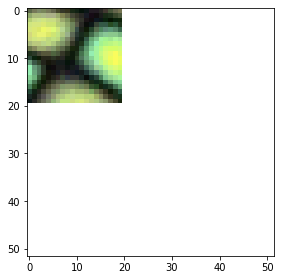

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


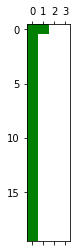

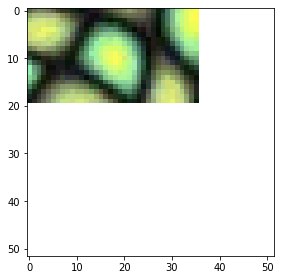

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


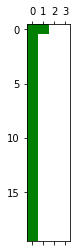

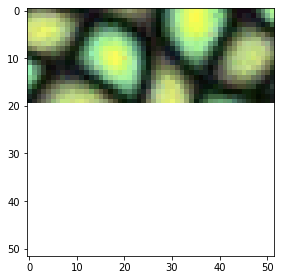

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
40 - 60


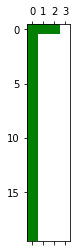

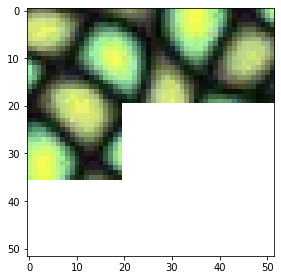

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
60 - 80


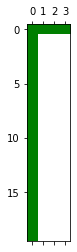

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
60 - 80


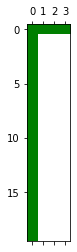

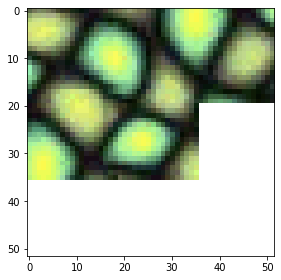

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


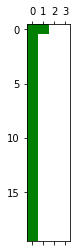

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
40 - 60


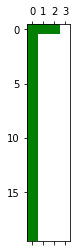

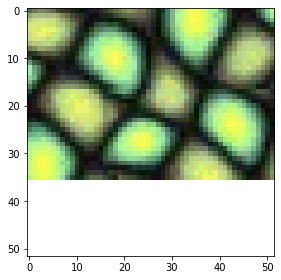

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
38 - 58
59 - 79
60 - 80


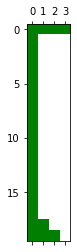

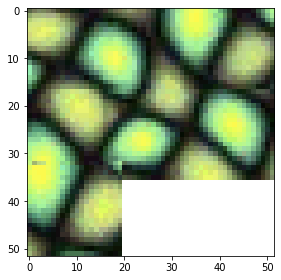

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
60 - 80


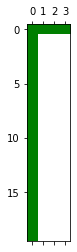

1 - 21
2 - 22
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40
25 - 45
26 - 46
27 - 47
28 - 48
29 - 49
30 - 50
31 - 51
32 - 52
33 - 53
34 - 54
35 - 55
36 - 56
37 - 57
38 - 58
39 - 59
40 - 60
43 - 63
44 - 64
45 - 65
46 - 66
47 - 67
48 - 68
49 - 69
50 - 70
51 - 71
52 - 72
53 - 73
54 - 74
55 - 75
56 - 76
57 - 77
58 - 78
59 - 79
60 - 80


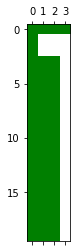

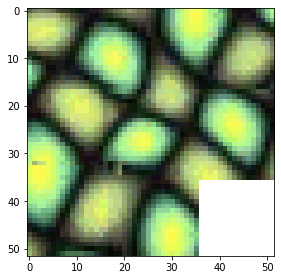

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


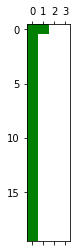

1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


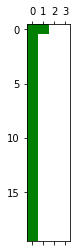

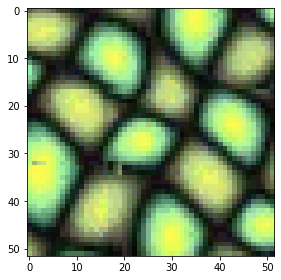

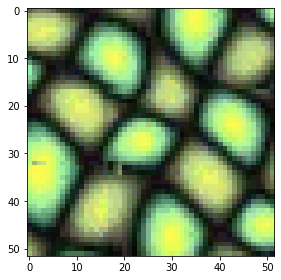

In [204]:
image = "https://raw.githubusercontent.com/axu2/image-quilting/master/test.png"
texture = io.imread(image)
res = quilt(texture, 20, (3, 3), "cut", True)
io.imshow(res)

# <span style='color:Blue'> Red Color Regions Representing Cuts </span>

In [138]:
COUNT = 0

class Graph: 
  
    def __init__(self,graph): 
        #Edmand Karp
        self.graph = graph 
        self. ROW = len(graph) 
        self.COL = len(graph[0]) 
        self.organiz_graph = [i[:] for i in graph] 

  
    def Breadth_First_search(self,s, t, parent): 
  
        # vertices as not visited 
        visited =[False]*(self.ROW) 
  
        # queue for BFS 
        queue=[] 
  
        # visited and enqueue it 
        queue.append(s) 
        visited[s] = True
  
        # BFS Loop 
        while queue: 
  
            #Dequeue from queue 
            u = queue.pop(0) 
   
            
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 

        # If we reached sink in BFS starting
        # from source, then return 
        # true, else false
        return True if visited[t] else False
          
     
    # DFS Traversal of the graph
    def Depth_first_search(self, graph,s,visited):
        visited[s]=True
        for i in range(len(graph)):
            if graph[s][i]>0 and not visited[i]:
                self.Depth_first_search(graph,i,visited)
  
    #  min-cut of the graph 
    def minCut(self, source, sink): 
  
        parent = [-1]*(self.ROW) 
  
        max_flow = 0 # intial flow   
        while self.Breadth_First_search(source, sink, parent) :  
            flow_path = float("Inf") 
            s = sink 
            while(s != source): 
                flow_path = min (flow_path, self.graph[parent[s]][s]) 
                s = parent[s] 
  
            # flow to overall flow 
            max_flow += flow_path 
  
            # update residual capacities of the edges and reverse edges  
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= flow_path 
                self.graph[v][u] += flow_path 
                v = parent[v] 
  
        visited=len(self.graph)*[False]
        self.Depth_first_search(self.graph,s,visited)
  
        for i in range(self.ROW): 
            for j in range(self.COL): 
                if self.graph[i][j] == 0 and\
                self.organiz_graph[i][j] > 0 and visited[i]: 
                    print(str(i) + " - " + str(j))
        return visited

def random_patch_1(texture, patchLength):
    #generating a random patch
    h, w, _ = texture.shape
    i = np.random.randint(h - patchLength)
    j = np.random.randint(w - patchLength)

    return texture[i:i+patchLength, j:j+patchLength]


def lap_error(patch, patchLength, overlap, res, y, x):
    # calculating patch error 
    error = 0

    if x > 0:
        left_side = patch[:, :overlap] - res[y:y+patchLength, x:x+overlap]
        error += np.sum(left_side**2)

    if y > 0:
        upper_side   = patch[:overlap, :] - res[y:y+overlap, x:x+patchLength]
        error += np.sum(upper_side**2)

    if x > 0 and y > 0:
        corner_side = patch[:overlap, :overlap] - res[y:y+overlap, x:x+overlap]
        error -= np.sum(corner_side**2)

    return error
 

def random_patch_2(texture, patchLength, overlap, res, y, x):
    # returning a best random patch based on error
    height, width, color_ = texture.shape
    errors = np.zeros((height - patchLength, width - patchLength))

    for i in range(height - patchLength):
        for j in range(width - patchLength):
            patch = texture[i:i+patchLength, j:j+patchLength]
            e = lap_error(patch, patchLength, overlap, res, y, x)
            errors[i, j] = e

    i, j = np.unravel_index(np.argmin(errors), errors.shape)
    return texture[i:i+patchLength, j:j+patchLength]

def quilt(texture, patchLength, numPatches, mode="cut", sequence=False):
    # main function call
    texture = util.img_as_float(texture)
    overlap = 4
    numPatchesHigh, numPatchesWide = numPatches

    h = (numPatchesHigh * patchLength) - (numPatchesHigh - 1) * overlap
    w = (numPatchesWide * patchLength) - (numPatchesWide - 1) * overlap

    res = np.zeros((h, w, texture.shape[2]))
    for i in range(3):
        for j in range(3):
            y = i * (patchLength - overlap)
            x = j * (patchLength - overlap)
            if i == 0 and j == 0 or mode == "random":
                #first row first column taking a random patch
                patch = random_patch_1(texture, patchLength)
                patch_1 = patch
                patch_2 = patch.copy()
                average_patch_1 = matrix_average(patch)
                average_patch_last_columns = get_last_columns(average_patch_1)
            elif mode == "cut":
                patch = random_patch_2(texture, patchLength, overlap, res, y, x)
                patch_3 = patch.copy()
                average_patch = matrix_average(patch) # calculating average pixels of the matrix
                if j == 1 and i ==0:
                    rand = patch
                    second = get_last_columns(average_patch) 
                average_patch_first_columns = get_first_columns(average_patch)
                avg_first_col = average_patch_first_columns.copy()
                if j == 1 and i ==0:
                    patch_test_1, patch = get_graph_matrix(average_patch_last_columns, average_patch_first_columns,patch_1, patch,  patchLength, overlap)
                    patch_0_1 = patch.copy()
                if j == 2 and i ==0:
                    patch_test, patch = get_graph_matrix(second, avg_first_col ,rand, patch_3, patchLength, overlap)
                    patch_0_2 = patch.copy()
                if i == 1 and j == 0:
                    test = matrix_average(patch_2)
                    ans = get_last_rows (test)
                    last_row_mat = ans.transpose()
                    test_1 = matrix_average(patch_3)
                    ans_1 = get_first_rows (test_1)
                    first_row_mat = ans_1.transpose()
                    patch_1_0_trans = patch_3.transpose(1,0,2)
                    patch_0_1_trans = patch_2.transpose(1,0,2)
                    com_patch, hori_0_1 = get_graph_matrix (last_row_mat, first_row_mat,patch_0_1_trans,patch_1_0_trans,patchLength, overlap)
                    patch = hori_0_1.transpose(1,0,2)
                    patch_1_0 = patch.copy()
                if i == 1 and j == 1:
                    avg_1_0 = matrix_average(patch_1_0)
                    last_1_0 = get_last_columns(avg_1_0)
                    com_patch_1, ver_1_0 = get_graph_matrix(last_1_0, average_patch_first_columns, patch_1_0, patch_3, patchLength, overlap)
                    avg_0_1 = matrix_average(patch_0_1)
                    last_rows_0_1 = get_last_rows(avg_0_1)
                    last_row_trans = last_rows_0_1.transpose()
                    avg_1_1 = matrix_average(ver_1_0)
                    first_rows_1_1 = get_first_rows(avg_1_1)
                    first_row_trans = first_rows_1_1.transpose()
                    patch_trans_1_0 = ver_1_0.transpose(1,0,2)
                    patch_trans_0_1 = patch_0_1.transpose(1,0,2)
                    com_patch_1_1, horz_1_1 = get_graph_matrix(last_row_trans, first_row_trans, patch_trans_0_1 , patch_trans_1_0, patchLength, overlap)
                    patch = horz_1_1.transpose(1,0,2)
                    patch_1_1 = patch.copy()
                
                if i == 1 and j == 2:
                    avg_1_2= matrix_average(patch_1_1)
                    last_1_1= get_last_columns(avg_1_2)
                    com_patch_2, ver_1_2 = get_graph_matrix(last_1_1, average_patch_first_columns, patch_1_1, patch_3, patchLength, overlap)
                    avg_0_2 = matrix_average(patch_0_2)
                    last_rows_0_2 = get_last_rows(avg_0_2)
                    last_row_trans_1_2 = last_rows_0_2.transpose()
                    avg_1_2 = matrix_average(ver_1_2)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_1_2 = ver_1_2.transpose(1,0,2)
                    patch_trans_0_2 = patch_0_2.transpose(1,0,2)
                    com_patch_1_1, horz_1_2 = get_graph_matrix(last_row_trans_1_2, first_row_trans, patch_trans_0_2 , patch_trans_1_2, patchLength, overlap)
                    patch = horz_1_2.transpose(1,0,2)
                    patch_trans_1_2 = patch.copy()

                if i == 2 and j == 0:
                    avg_matrix_1_0  = matrix_average(patch_1_0)
                    last_rows_1_0 = get_last_rows (avg_matrix_1_0)
                    last_row_mat_1_0 = last_rows_1_0.transpose()
                    avg_matrix_2_0 = matrix_average(patch_3)
                    first_rows_2_0 = get_first_rows (avg_matrix_2_0)
                    first_row_mat_2_0 = first_rows_2_0.transpose()
                    patch = patch_3.transpose(1,0,2)
                    patch_1_s = patch_1_0.transpose(1,0,2)
                    com_patch, ver_2_0 = get_graph_matrix (last_row_mat_1_0, first_row_mat_2_0,patch_1_s,patch,patchLength, overlap)
                    patch = ver_2_0.transpose(1,0,2)
                    patch_2_0 = patch.copy()
                
                if i == 2 and j == 1:
                    avg_2_0= matrix_average(patch_2_0)
                    last_2_0= get_last_columns(avg_2_0)
                    com_patch_3, ver_2_0 = get_graph_matrix(last_2_0, average_patch_first_columns, patch_2_0, patch_3, patchLength, overlap)
                    avg_1_1 = matrix_average(patch_1_1)
                    last_rows_1_1 = get_last_rows(avg_1_1)
                    last_row_trans_1_1 = last_rows_1_1.transpose()
                    avg_1_2 = matrix_average(ver_2_0)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_2_0 = ver_2_0.transpose(1,0,2)
                    patch_trans_0_2 = patch_1_1.transpose(1,0,2)
                    com_patch_1_1, horz_2_1 = get_graph_matrix(last_row_trans_1_1, first_row_trans, patch_trans_0_2 , patch_trans_2_0, patchLength, overlap)
                    patch = horz_2_1.transpose(1,0,2)
                    patch_trans_2_1 = patch.copy()
                
                if i == 2 and j == 2:
                    avg_2_1= matrix_average(patch_trans_2_1)
                    last_2_1= get_last_columns(avg_2_1)
                    com_patch_5, ver_2_2 = get_graph_matrix(last_2_1, avg_first_col , patch_trans_2_1, patch_3, patchLength, overlap)
                    avg_1_2 = matrix_average(patch_trans_1_2)
                    last_rows_1_2 = get_last_rows(avg_1_2)
                    last_row_trans_1_2_2 = last_rows_1_2.transpose()
                    avg_2_2 = matrix_average(ver_2_2)
                    first_rows_2_2 = get_first_rows(avg_2_2)
                    first_row_trans_2_2 = first_rows_2_2.transpose()
                    patch_trans_2_2 = ver_2_2.transpose(1,0,2)
                    patch_trans_1_2_1 = patch_trans_1_2.transpose(1,0,2)
                    com_patch_1_1, horz_2_2 = get_graph_matrix(last_row_trans_1_2_2, first_row_trans_2_2, patch_trans_1_2_1 , patch_trans_2_2, patchLength, overlap)
                    patch = horz_2_2.transpose(1,0,2)
                    patch_trans_2_2 = patch.copy()                    

            res[y:y+patchLength, x:x+ patchLength] = patch

            if sequence:
                io.imshow(res)
                io.show()

    return res

def get_last_columns(patch):
    # last 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[-4:]
        _list.append(columns)
    return np.array(_list)

def get_first_columns(patch):
    # first 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[:4]
        _list.append(columns)
    return np.array(_list)

def get_last_rows(patch):
    # last 4 rows
    return (patch[-4:, :])

def get_first_rows(patch):
    # first 4 rows 
    return (patch [:4, :])



def get_graph_matrix(a, b, c,d, patch_length, overlap):
    _list = []
    test = []
    main_list = []
    global COUNT
    COUNT +=  1
    for i in range(patch_length-1):
        for j in range(1):
            horizontal_capacity = abs((a[i][j] - b[i][j]) + abs(a[i][j+1] - b[i][j+1]))+ 0.5  # calculating edge weights for the nodes
            horizontal_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i][j+2] - b[i][j+2]) + 0.5
            horizontal_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i][j+3] - b[i][j+3]) + 0.5
            vertical_capacity = abs(a[i+1][j] - b[i+1][j]) + abs(a[i][j] - b[i][j]) + 0.5
            vertical_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i+1][j+1] - b[i+1][j+1]) + 0.5 
            vertical_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i+1][j+2] - b[i+1][j+2]) + 0.5
            vertical_capacity_3 = abs(a[i][j+3] - b[i][j+3]) + abs(a[i+1][j+3] - b[i+1][j+3]) + 0.5
            _list.append([horizontal_capacity, horizontal_capacity_1, horizontal_capacity_2 ,vertical_capacity, vertical_capacity_1,vertical_capacity_2, vertical_capacity_3])
    _list.append([abs((a[patch_length-1][overlap-4] - b[patch_length-1][overlap-4]) + abs(a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3] )) + 0.5,abs((a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3]) + abs(a[patch_length-1][overlap-2] - b[patch_length-1][overlap-2])) + 0.5,abs((a[patch_length-1][overlap-2] - b[19-1][overlap-2]) + abs(a[patch_length-1][overlap -1] - b[patch_length-1][overlap -1])) + 0.5,0,0,0,0])
    for i in range(patch_length*4 +2):
        test = []
        # calculation of Adjacency matrix
        for j in range(patch_length*4 +2):
            if i == j :
                test.append(0)
            elif i == 0:
                if j <= patch_length :
                    test.append(10000)
                else :
                    test.append(0)
            elif i == (4*(patch_length))+1:
                test.append(0)
            elif i > 0 and i <= patch_length:
                if j == i+patch_length:
                    k = abs(i% patch_length)
                    test.append(_list[k-1][0])
                elif j == i +1:
                    p = abs(i% patch_length)
                    test.append(_list[p-1][3])
                else :
                    test.append(0)
            elif i > patch_length and i <= 2*patch_length :
                if j == i +patch_length:
                    q = abs(i%patch_length)
                    test.append(_list[q-1][1])
                elif j == i+1:
                    w = abs(i%patch_length)
                    test.append(_list[w-1][4])
                else :
                    test.append(0)    
            elif (i > 2*patch_length and i <=3*patch_length): 
                if j == i +patch_length:
                    h = abs(i%patch_length)
                    test.append(_list[h-1][2])
                elif j == i+1:
                    m = abs(i%patch_length)
                    test.append(_list[m-1][5])
                else :
                    test.append(0)

            elif i > ((3*patch_length) ) and i < ((4*patch_length)+1) :
                if j == (4*(patch_length))+1 :
                    test.append(10000)

                elif j == i +1 :
                    v = abs(4*patch_length - i) 
                    test.append(_list[v-1][6])
                else:
                    test.append(0)
        main_list.append(test) # final creation of adjacency matrix 
    #wiriting_adj_matrix(main_list, COUNT)    
    g = Graph(main_list) # creating an object for the algo class
    source = 0; sink = (patch_length*4) +1
    visit = g.minCut(source, sink) # calling the algo function 
    #visit_plot(visit, patch_length)
    
    c_ = np.array(c).tolist()
    d_ = np.array(d).tolist()
    for i in range(len(visit)):
        if i == 0 or i == len(visit)-1:
            continue
        # replacing the actual pixels 
        elif visit[i] == True:
            h = abs(i%patch_length)
            if i >0 and i <= patch_length:
                d[h-1][0] = [255,0,0,1]
            elif i > patch_length and i <= 2*patch_length:
                d[h-1][1] = [255,0,0,1]
            elif i > 2*patch_length and i <= 3*patch_length:
                d[h-1][2] = [255,0,0,1]
            elif i > 3*patch_length and i <= 4*patch_length:
                d[h-1][3] = [255,0,0,1]

        elif visit[i] == False:
            f = abs(i%patch_length)
            if i >0 and i <= patch_length:
                c[f-1][0] = [255,0,0,1]
            elif i > patch_length and i <= 2*patch_length:
                c[f-1][1] = [255,0,0,1]
            elif i > 2*patch_length and i <= 3*patch_length:
                c[f-1][2] = [255,0,0,1]
            elif i > 3*patch_length and i <= 4*patch_length:
                c[f-1][3] = [255,0,0,1]

    e = np.array(c)
    f = np.array(d)
    t = np.hstack((e,f))
    return t, f[:, -(patch_length):] 

def visit_plot(visited, patch_length):

    ctr = 0
    cut_matrix = []
    for i in range(0,20):
        colorsRow = []
        for j in range(0,4):
            colorsRow.append(2)
        cut_matrix.append(colorsRow)

    for i in range(0,4):
        for j in range(0,20):
            if visited[ctr] == True:
                cut_matrix[j][i] = 1
            ctr+=1

    fig, ax = plt.subplots()
    ax.matshow(cut_matrix, cmap='ocean')
    plt.show()



def matrix_average(patch):
    main_list = []
    for i in patch:
        average_list = []
        for j in i:
            average = j[0] + j[1] + j[2] / 3
            average_list.append(average)
        main_list.append(average_list)
    res = np.array(main_list)
    return res

def wiriting_adj_matrix(matrix, count):
    dirt = os.getcwd()
    with open(os.path.join(dirt, "Adj_matrice_file" + str(count)+ ".txt"), 'w') as new_file:
        json.dump(matrix, new_file)

                   

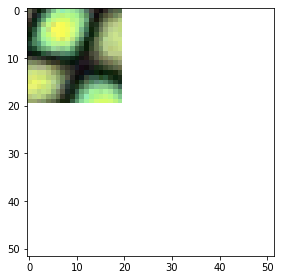

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


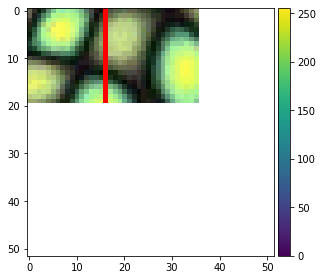

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40


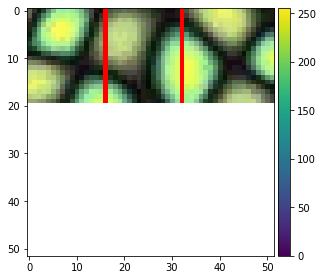

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
40 - 60


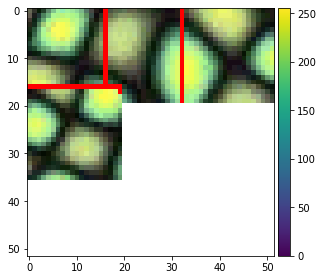

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40
21 - 41
22 - 42
27 - 47
28 - 29
28 - 48
43 - 63
44 - 64
45 - 65
46 - 66
47 - 67
48 - 49
48 - 68
1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
39 - 59
40 - 60


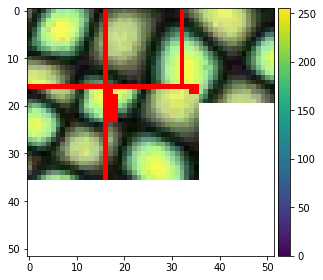

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
16 - 36
17 - 37
18 - 38
19 - 39
34 - 54
35 - 55
36 - 56
37 - 57
38 - 58
39 - 59
40 - 60
1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
16 - 36
19 - 39
40 - 60
54 - 74
55 - 75
56 - 76
57 - 77
58 - 78
59 - 79
60 - 80


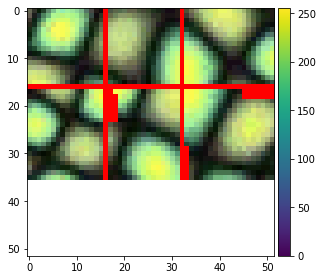

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
40 - 60


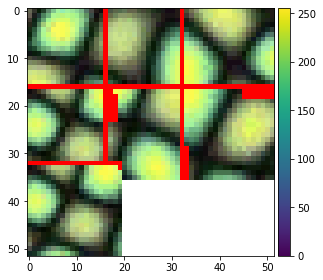

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40
21 - 41
22 - 42
28 - 29
28 - 48
43 - 63
44 - 64
45 - 65
46 - 66
47 - 67
48 - 49
48 - 68
1 - 21
2 - 22
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
20 - 40
24 - 44
25 - 26
25 - 45
26 - 46
27 - 47
33 - 53
34 - 54
35 - 36
35 - 55
43 - 63
44 - 64
45 - 65
46 - 66
47 - 67
48 - 68
49 - 69
50 - 70
51 - 71
52 - 72
53 - 73
54 - 55
54 - 74


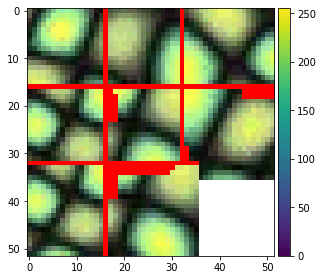

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
54 - 74
55 - 75
56 - 76
57 - 77
58 - 78
59 - 79
60 - 80
1 - 21
2 - 22
3 - 23
4 - 24
5 - 25
6 - 26
7 - 27
8 - 28
9 - 29
10 - 30
11 - 31
12 - 32
13 - 33
14 - 34
15 - 35
16 - 36
17 - 37
18 - 38
19 - 39
60 - 80


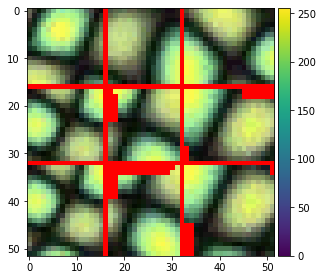

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


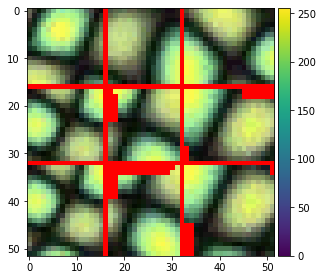

In [139]:
image = "https://raw.githubusercontent.com/axu2/image-quilting/master/test.png"
texture = io.imread(image)
#print("Input Image --")
#io.imshow(texture)
res = quilt(texture, 20, (3, 3), "cut", True)
io.imshow(res)

# <span style='color:Blue'> Implementation of Graph cut Images using Ford Fulkerson Algorithm </span>

In [172]:
class Graph_algo:
    def __init__(self) -> None:
        self.items_visited = 1
        
    def fordFulkerson(self, paths, source, sink):
        n = len(paths)
        visited = [0] * n
        minCut = [False] * n
        maxFlow = 0

        while(True):
            flow = self.dfs(paths, visited, source, sink, float('inf'))
            self.items_visited += 1
            
            maxFlow += flow
            if flow < 1e-4:
                for i in range(0,n):
                    if (visited[i] == self.items_visited-1):
                         minCut[i] = True
                return minCut
            
            
    def dfs(self,caps, visited, node, sink, flow):
        if (node == sink): 
            return flow

        cap = caps[node]
        visited[node] = self.items_visited

        for i in range(len(cap)):
            if visited[i] != self.items_visited and cap[i] > 0:

                if (cap[i] < flow):
                    flow = cap[i]
                dfsFlow = self.dfs(caps, visited, i, sink, flow)

                if (dfsFlow > 0):
                    caps[node][i] -= dfsFlow
                    caps[i][node] += dfsFlow
                    return dfsFlow

        return 0



def random_patch_1(texture, patchLength):
    #generating a random patch
    h, w, _ = texture.shape
    i = np.random.randint(h - patchLength)
    j = np.random.randint(w - patchLength)

    return texture[i:i+patchLength, j:j+patchLength]


def lap_error(patch, patchLength, overlap, res, y, x):
    # calculating patch error 
    error = 0

    if x > 0:
        left_side = patch[:, :overlap] - res[y:y+patchLength, x:x+overlap]
        error += np.sum(left_side**2)

    if y > 0:
        upper_side   = patch[:overlap, :] - res[y:y+overlap, x:x+patchLength]
        error += np.sum(upper_side**2)

    if x > 0 and y > 0:
        corner_side = patch[:overlap, :overlap] - res[y:y+overlap, x:x+overlap]
        error -= np.sum(corner_side**2)

    return error
 

def random_patch_2(texture, patchLength, overlap, res, y, x):
    # returning a best random patch based on error
    height, width, color_ = texture.shape
    errors = np.zeros((height - patchLength, width - patchLength))

    for i in range(height - patchLength):
        for j in range(width - patchLength):
            patch = texture[i:i+patchLength, j:j+patchLength]
            e = lap_error(patch, patchLength, overlap, res, y, x)
            errors[i, j] = e

    i, j = np.unravel_index(np.argmin(errors), errors.shape)
    return texture[i:i+patchLength, j:j+patchLength]

def quilt(texture, patchLength, numPatches, mode="cut", sequence=False):
    # main function call
    texture = util.img_as_float(texture)
    overlap = 4
    numPatchesHigh, numPatchesWide = numPatches

    h = (numPatchesHigh * patchLength) - (numPatchesHigh - 1) * overlap
    w = (numPatchesWide * patchLength) - (numPatchesWide - 1) * overlap

    res = np.zeros((h, w, texture.shape[2]))
    for i in range(3):
        for j in range(3):
            y = i * (patchLength - overlap)
            x = j * (patchLength - overlap)
            if i == 0 and j == 0 or mode == "random":
                #first row first column taking a random patch
                patch = random_patch_1(texture, patchLength)
                patch_1 = patch
                patch_2 = patch.copy()
                average_patch_1 = matrix_average(patch)
                average_patch_last_columns = get_last_columns(average_patch_1)
            elif mode == "cut":
                patch = random_patch_2(texture, patchLength, overlap, res, y, x)
                patch_3 = patch.copy()
                average_patch = matrix_average(patch) # calculating average pixels of the matrix
                if j == 1 and i ==0:
                    rand = patch
                    second = get_last_columns(average_patch) 
                average_patch_first_columns = get_first_columns(average_patch)
                avg_first_col = average_patch_first_columns.copy()
                if j == 1 and i ==0:
                    patch_test_1, patch = get_graph_matrix(average_patch_last_columns, average_patch_first_columns,patch_1, patch,  patchLength, overlap)
                    patch_0_1 = patch.copy()
                if j == 2 and i ==0:
                    patch_test, patch = get_graph_matrix(second, avg_first_col ,rand, patch_3, patchLength, overlap)
                    patch_0_2 = patch.copy()
                if i == 1 and j == 0:
                    test = matrix_average(patch_2)
                    ans = get_last_rows (test)
                    last_row_mat = ans.transpose()
                    test_1 = matrix_average(patch_3)
                    ans_1 = get_first_rows (test_1)
                    first_row_mat = ans_1.transpose()
                    patch_1_0_trans = patch_3.transpose(1,0,2)
                    patch_0_1_trans = patch_2.transpose(1,0,2)
                    com_patch, hori_0_1 = get_graph_matrix (last_row_mat, first_row_mat,patch_0_1_trans,patch_1_0_trans,patchLength, overlap)
                    patch = hori_0_1.transpose(1,0,2)
                    patch_1_0 = patch.copy()
                if i == 1 and j == 1:
                    avg_1_0 = matrix_average(patch_1_0)
                    last_1_0 = get_last_columns(avg_1_0)
                    com_patch_1, ver_1_0 = get_graph_matrix(last_1_0, average_patch_first_columns, patch_1_0, patch_3, patchLength, overlap)
                    avg_0_1 = matrix_average(patch_0_1)
                    last_rows_0_1 = get_last_rows(avg_0_1)
                    last_row_trans = last_rows_0_1.transpose()
                    avg_1_1 = matrix_average(ver_1_0)
                    first_rows_1_1 = get_first_rows(avg_1_1)
                    first_row_trans = first_rows_1_1.transpose()
                    patch_trans_1_0 = ver_1_0.transpose(1,0,2)
                    patch_trans_0_1 = patch_0_1.transpose(1,0,2)
                    com_patch_1_1, horz_1_1 = get_graph_matrix(last_row_trans, first_row_trans, patch_trans_0_1 , patch_trans_1_0, patchLength, overlap)
                    patch = horz_1_1.transpose(1,0,2)
                    patch_1_1 = patch.copy()
                
                if i == 1 and j == 2:
                    avg_1_2= matrix_average(patch_1_1)
                    last_1_1= get_last_columns(avg_1_2)
                    com_patch_2, ver_1_2 = get_graph_matrix(last_1_1, average_patch_first_columns, patch_1_1, patch_3, patchLength, overlap)
                    avg_0_2 = matrix_average(patch_0_2)
                    last_rows_0_2 = get_last_rows(avg_0_2)
                    last_row_trans_1_2 = last_rows_0_2.transpose()
                    avg_1_2 = matrix_average(ver_1_2)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_1_2 = ver_1_2.transpose(1,0,2)
                    patch_trans_0_2 = patch_0_2.transpose(1,0,2)
                    com_patch_1_1, horz_1_2 = get_graph_matrix(last_row_trans_1_2, first_row_trans, patch_trans_0_2 , patch_trans_1_2, patchLength, overlap)
                    patch = horz_1_2.transpose(1,0,2)
                    patch_trans_1_2 = patch.copy()

                if i == 2 and j == 0:
                    avg_matrix_1_0  = matrix_average(patch_1_0)
                    last_rows_1_0 = get_last_rows (avg_matrix_1_0)
                    last_row_mat_1_0 = last_rows_1_0.transpose()
                    avg_matrix_2_0 = matrix_average(patch_3)
                    first_rows_2_0 = get_first_rows (avg_matrix_2_0)
                    first_row_mat_2_0 = first_rows_2_0.transpose()
                    patch = patch_3.transpose(1,0,2)
                    patch_1_s = patch_1_0.transpose(1,0,2)
                    com_patch, ver_2_0 = get_graph_matrix (last_row_mat_1_0, first_row_mat_2_0,patch_1_s,patch,patchLength, overlap)
                    patch = ver_2_0.transpose(1,0,2)
                    patch_2_0 = patch.copy()
                
                if i == 2 and j == 1:
                    avg_2_0= matrix_average(patch_2_0)
                    last_2_0= get_last_columns(avg_2_0)
                    com_patch_3, ver_2_0 = get_graph_matrix(last_2_0, average_patch_first_columns, patch_2_0, patch_3, patchLength, overlap)
                    avg_1_1 = matrix_average(patch_1_1)
                    last_rows_1_1 = get_last_rows(avg_1_1)
                    last_row_trans_1_1 = last_rows_1_1.transpose()
                    avg_1_2 = matrix_average(ver_2_0)
                    first_rows_1_2 = get_first_rows(avg_1_2)
                    first_row_trans = first_rows_1_2.transpose()
                    patch_trans_2_0 = ver_2_0.transpose(1,0,2)
                    patch_trans_0_2 = patch_1_1.transpose(1,0,2)
                    com_patch_1_1, horz_2_1 = get_graph_matrix(last_row_trans_1_1, first_row_trans, patch_trans_0_2 , patch_trans_2_0, patchLength, overlap)
                    patch = horz_2_1.transpose(1,0,2)
                    patch_trans_2_1 = patch.copy()
                
                if i == 2 and j == 2:
                    avg_2_1= matrix_average(patch_trans_2_1)
                    last_2_1= get_last_columns(avg_2_1)
                    com_patch_5, ver_2_2 = get_graph_matrix(last_2_1, avg_first_col , patch_trans_2_1, patch_3, patchLength, overlap)
                    avg_1_2 = matrix_average(patch_trans_1_2)
                    last_rows_1_2 = get_last_rows(avg_1_2)
                    last_row_trans_1_2_2 = last_rows_1_2.transpose()
                    avg_2_2 = matrix_average(ver_2_2)
                    first_rows_2_2 = get_first_rows(avg_2_2)
                    first_row_trans_2_2 = first_rows_2_2.transpose()
                    patch_trans_2_2 = ver_2_2.transpose(1,0,2)
                    patch_trans_1_2_1 = patch_trans_1_2.transpose(1,0,2)
                    com_patch_1_1, horz_2_2 = get_graph_matrix(last_row_trans_1_2_2, first_row_trans_2_2, patch_trans_1_2_1 , patch_trans_2_2, patchLength, overlap)
                    patch = horz_2_2.transpose(1,0,2)
                    patch_trans_2_2 = patch.copy()                    

            res[y:y+patchLength, x:x+ patchLength] = patch

            if sequence:
                io.imshow(res)
                io.show()

    return res

def get_last_columns(patch):
    # last 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[-4:]
        _list.append(columns)
    return np.array(_list)

def get_first_columns(patch):
    # first 4 columns for the overlap
    _list = []
    for i in patch:
        columns = i[:4]
        _list.append(columns)
    return np.array(_list)

def get_last_rows(patch):
    # last 4 rows
    return (patch[-4:, :])

def get_first_rows(patch):
    # first 4 rows 
    return (patch [:4, :])



def get_graph_matrix(a, b, c,d, patch_length, overlap):
    _list = []
    test = []
    main_list = []
    global COUNT
    COUNT +=  1
    for i in range(patch_length-1):
        for j in range(1):
            horizontal_capacity = abs((a[i][j] - b[i][j]) + abs(a[i][j+1] - b[i][j+1]))+ 0.5  # calculating edge weights for the nodes
            horizontal_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i][j+2] - b[i][j+2]) + 0.5
            horizontal_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i][j+3] - b[i][j+3]) + 0.5
            vertical_capacity = abs(a[i+1][j] - b[i+1][j]) + abs(a[i][j] - b[i][j]) + 0.5
            vertical_capacity_1 = abs(a[i][j+1] - b[i][j+1]) + abs(a[i+1][j+1] - b[i+1][j+1]) + 0.5 
            vertical_capacity_2 = abs(a[i][j+2] - b[i][j+2]) + abs(a[i+1][j+2] - b[i+1][j+2]) + 0.5
            vertical_capacity_3 = abs(a[i][j+3] - b[i][j+3]) + abs(a[i+1][j+3] - b[i+1][j+3]) + 0.5
            _list.append([horizontal_capacity, horizontal_capacity_1, horizontal_capacity_2 ,vertical_capacity, vertical_capacity_1,vertical_capacity_2, vertical_capacity_3])
    _list.append([abs((a[patch_length-1][overlap-4] - b[patch_length-1][overlap-4]) + abs(a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3] )) + 0.5,abs((a[patch_length-1][overlap-3] - b[patch_length-1][overlap-3]) + abs(a[patch_length-1][overlap-2] - b[patch_length-1][overlap-2])) + 0.5,abs((a[patch_length-1][overlap-2] - b[19-1][overlap-2]) + abs(a[patch_length-1][overlap -1] - b[patch_length-1][overlap -1])) + 0.5,0,0,0,0])
    for i in range(patch_length*4 +2):
        test = []
        # calculation of Adjacency matrix
        for j in range(patch_length*4 +2):
            if i == j :
                test.append(0)
            elif i == 0:
                if j <= patch_length :
                    test.append(10000)
                else :
                    test.append(0)
            elif i == (4*(patch_length))+1:
                test.append(0)
            elif i > 0 and i <= patch_length:
                if j == i+patch_length:
                    k = abs(i% patch_length)
                    test.append(_list[k-1][0])
                elif j == i +1:
                    p = abs(i% patch_length)
                    test.append(_list[p-1][3])
                else :
                    test.append(0)
            elif i > patch_length and i <= 2*patch_length :
                if j == i +patch_length:
                    q = abs(i%patch_length)
                    test.append(_list[q-1][1])
                elif j == i+1:
                    w = abs(i%patch_length)
                    test.append(_list[w-1][4])
                else :
                    test.append(0)    
            elif (i > 2*patch_length and i <=3*patch_length): 
                if j == i +patch_length:
                    h = abs(i%patch_length)
                    test.append(_list[h-1][2])
                elif j == i+1:
                    m = abs(i%patch_length)
                    test.append(_list[m-1][5])
                else :
                    test.append(0)

            elif i > ((3*patch_length) ) and i < ((4*patch_length)+1) :
                if j == (4*(patch_length))+1 :
                    test.append(10000)

                elif j == i +1 :
                    v = abs(4*patch_length - i) 
                    test.append(_list[v-1][6])
                else:
                    test.append(0)
        main_list.append(test) # final creation of adjacency matrix 
    #wiriting_adj_matrix(main_list, COUNT)    
    g = Graph_algo() # creating an object for the algo class
    source = 0; sink = (patch_length*4) +1
    visit = g.fordFulkerson(main_list,source, sink) # calling the algo function 
    visit_plot(visit, patch_length)
    

    c_ = np.array(c).tolist()
    d_ = np.array(d).tolist()
    for i in range(len(visit)):
        if i == 0 or i == len(visit)-1:
            continue
        # replacing the actual pixels 
        elif visit[i] == True:
            h = abs(i%patch_length)
            if i >0 and i <= patch_length:
                d[h-1][0] = c[h-1][patch_length-4]
            elif i > patch_length and i <= 2*patch_length:
                d[h-1][1] = c[h-1][patch_length-3]
            elif i > 2*patch_length and i <= 3*patch_length:
                d[h-1][2] = c[h-1][patch_length-2]
            elif i > 3*patch_length and i <= 4*patch_length:
                d[h-1][3] = c[h-1][patch_length-1]

        elif visit[i] == False:
            f = abs(i%patch_length)
            if i >0 and i <= patch_length:
                c[f-1][0] = d[f-1][patch_length-4]
            elif i > patch_length and i <= 2*patch_length:
                c[f-1][1] = d[f-1][patch_length-3]
            elif i > 2*patch_length and i <= 3*patch_length:
                c[f-1][2] = d[f-1][patch_length-2]
            elif i > 3*patch_length and i <= 4*patch_length:
                c[f-1][3] = d[f-1][patch_length-1]

    e = np.array(c)
    f = np.array(d)
    t = np.hstack((e,f))
    return t, f[:, -(patch_length):] 

def visit_plot(visited, patch_length):

    ctr = 0
    cut_matrix = []
    for i in range(20):
        colorsRow = []
        for j in range(0,4):
            colorsRow.append(2)
        cut_matrix.append(colorsRow)

    for i in range(0,4):
        for j in range(0,20):
            if visited[ctr] == True:
                cut_matrix[j][i] = 1
            ctr+=1

    fig, ax = plt.subplots()
    ax.matshow(cut_matrix, cmap='ocean')
    plt.show()



def matrix_average(patch):
    main_list = []
    for i in patch:
        average_list = []
        for j in i:
            average = j[0] + j[1] + j[2] / 3
            average_list.append(average)
        main_list.append(average_list)
    res = np.array(main_list)
    return res

def wiriting_adj_matrix(matrix, count):
    dirt = os.getcwd()
    with open(os.path.join(dirt, "Adj_matrice_file" + str(count)+ ".txt"), 'w') as new_file:
        json.dump(matrix, new_file)

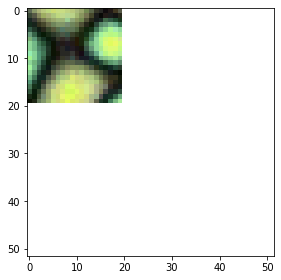

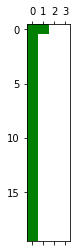

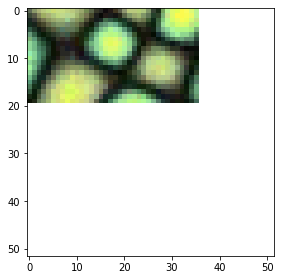

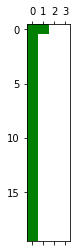

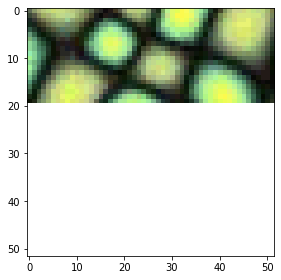

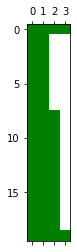

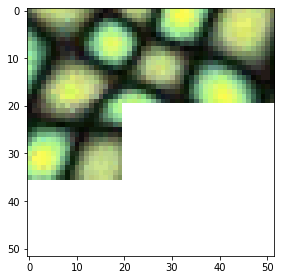

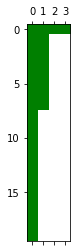

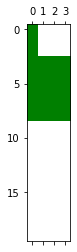

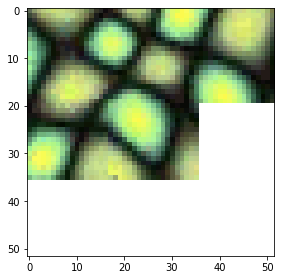

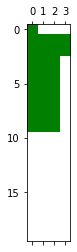

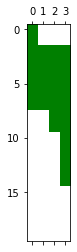

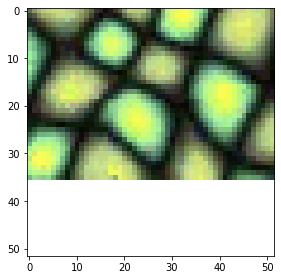

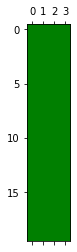

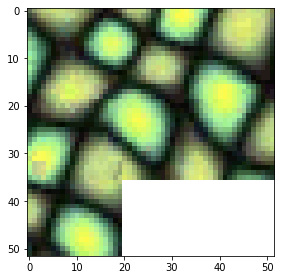

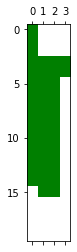

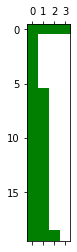

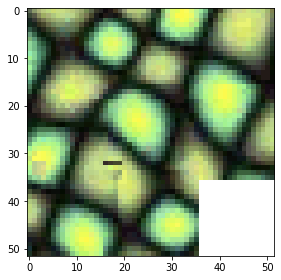

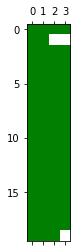

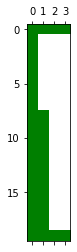

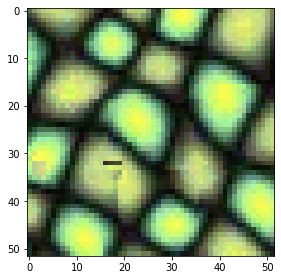

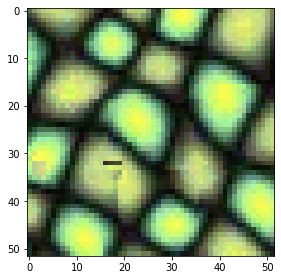

In [179]:
image = "https://raw.githubusercontent.com/axu2/image-quilting/master/test.png"
texture = io.imread(image)
#print("Input Image --")
#io.imshow(texture)
res = quilt(texture, 20, (3, 3), "cut", True)
io.imshow(res)